## Introduction - Importing Dataset

In this case, I am going to look at the strength of the correlation between **‘accessed to improved water sources’** and **‘life expectancy at birth’**. Therefore, I have searched data sources and found ‘life expectancy 2014 dataset’, in [Kaggle.com](https://www.kaggle.com/kacperk77/life-expectancy)[](http://)

In [1]:
library(tidyverse)
library(readxl)
library(ggplot2)

dataset <- read_csv("../input/lifeexp2/lifeexpect.csv", col_types = cols(
                        col_character(),
                        col_character(),
                        col_double(),
                        col_double()))
head(dataset)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.0          ✔ dplyr   0.8.5     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Country,Status,wateraccess,lifeexp
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,Leastdeveloped,55.2,62.90
Albania,Developing,95.1,77.96
Algeria,Developing,84.0,75.64
Angola,Leastdeveloped,48.6,60.86
Antigua and Barbuda,Developing,97.9,76.05
Armenia,Developing,100.0,74.26


## Descriptive Statistics

Now, I will introduce dataset. In the dataset, there are 4 columns. They are;

‘Country’, which is our case id for each variable and there are 138 countries,
‘Status’, which express our countries of the level of development and there are 3 different levels which are Developed, Developing, Leastdeveloped,
‘wateraccess’, that gives us access to improved water sources (% of the total population with access in 2014,
‘lifeexp’, which is years of life expectancy at birth in 2014.

![](http://)Before looking at the relationship between our variables, I will look at their status as mean, median, min., max. and so on by R.

In [2]:
lifexp_dev <- dataset$lifeexp[which(dataset$Status == "Developed")]

lifexp_und <- dataset$lifeexp[which(dataset$Status == "Developing")]

lifexp_led <- dataset$lifeexp[which(dataset$Status == "Leastdeveloped")]

summary(lifexp_dev)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  74.12   79.53   81.38   80.34   82.26   83.59 

When we calculate summary statiscs of developed countries, we can see there is no big difference between mean and median. Life expectancy of developed countries is about 80.

In [3]:
summary(lifexp_und)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.55   70.19   74.23   72.65   76.31   82.67 

When we look at summary statiscs of developing countries, we can see there is small difference between mean and median. Life expectancy of developing countries is about 73 and this result is lower than developed countries.

In [4]:
summary(lifexp_led)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.62   59.34   62.76   62.41   66.33   71.80 

And lastly, when we look at summary statiscs of least developed countries, we can see there is no difference between mean and median. However, life expectancy of least developed countries is about 62 and this result is much lower than developed countries.

In [5]:
summary(dataset$wateraccess)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   81.72   95.35   88.55   99.67  100.00 

When we look at statistics for water access, we can see the mean of ‘wateraccess’ is about 89% and the median 95%. This result gives us a small difference between them but there is a probability to have outliers. For this reason, we should check the outliers and then we will back the descriptives.

[1] 48.6 50.8 47.8 50.6 40.0


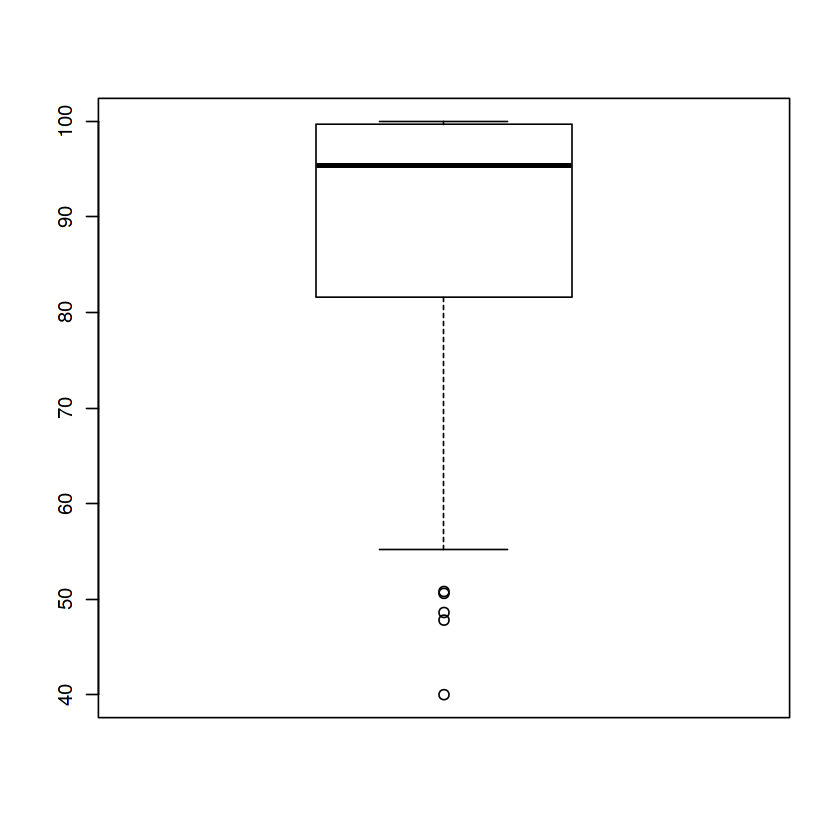

In [6]:
boxplot(dataset$wateraccess)
OutVals = boxplot(dataset$wateraccess)$out
print(OutVals)

We detected some outliers.

In [7]:
summary(OutVals)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   47.80   48.60   47.56   50.60   50.80 

As you can see above, we have 5 outlier countries and their mean is about 48. If we remove outlier we would have 90% water access.

In [8]:
which(dataset$wateraccess %in% OutVals)
dataset$Country[c(4,27,39,77,100)]

[1]   4  27  39  77 100

[1] "Angola"            "Chad"              "Equatorial Guinea"
[4] "Madagascar"        "Papua New Guinea"

We detected these outlier countries. 

In [9]:
library(psych)
describe(dataset$wateraccess)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,138,88.55435,14.73225,95.35,91.24196,6.89409,40,100,60,-1.377846,0.8906463,1.254092


There are some outliers which are Madagascar, Angola, Chad, Equatorial Guinea and Papua New Guinea. Water accessed percentages of these countries are under %60. This means, mean fails to reflect most of the data. We use the median instead of the mean to remove the influence of outliers. Median is the middle value in a distribution of data listed in numeric order. Outliers and skewed data have a smaller effect on the median.

When we back the descriptive, we can see there is a big range which is 60% and the standard deviation is 14.73 which means individual scores are spread out slightly far from the mean. When the mean is less than the median, has a negative skewness and in our result, we have -1.408 that means distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side, and the mean is less than the mode. Kurtosis is also 1.028 which means distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than mesokurtic, which means that data are light-tailed or lack of outliers. The reason for this is because the extreme values are less than that of the normal distribution.

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,138,71.61601,8.202179,73.75,72.20812,8.295147,50.62,83.59,32.97,-0.5895582,-0.4670055,0.6982159


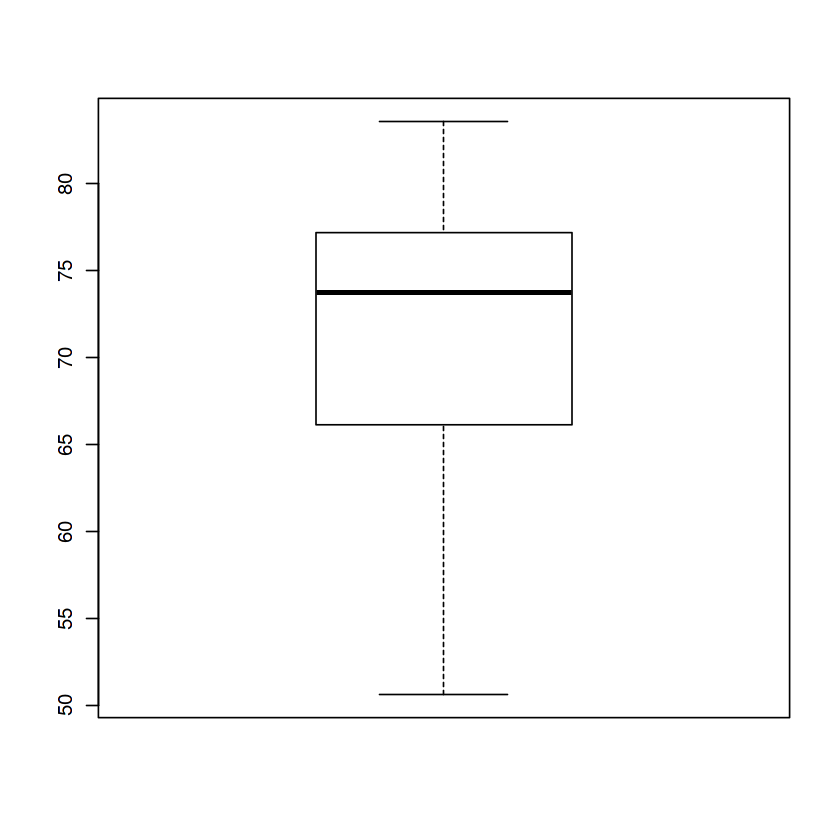

In [10]:
describe(dataset$lifeexp)
boxplot(dataset$lifeexp)

In these results, there is no big difference between mean, which is 71.62, and median, which is 73.75. So, we can say there is no outlier. To check that we are looking at our plot above. As you can see there is no outlier and we can use our mean. Because in a symmetric distribution, the mean locates the center accurately. However, in a skewed distribution, the mean can miss the mark. 

## Correlations

After looking at the descriptive statistics of our variables, we can assess correlations. In the calculations below, there are Pearson and Spearman’s rho methods. The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

In [11]:
cor.test(dataset$wateraccess, dataset$lifeexp, method = "pearson") # Pearson's Correlation
cor.test(dataset$wateraccess, dataset$lifeexp, method = "spearman") # Spearman's Correlation


	Pearson's product-moment correlation

data:  dataset$wateraccess and dataset$lifeexp
t = 13.136, df = 136, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6636330 0.8132835
sample estimates:
      cor 
0.7478086 


Warning message in cor.test.default(dataset$wateraccess, dataset$lifeexp, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  dataset$wateraccess and dataset$lifeexp
S = 70804, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8383437 


Correlations values are 0.75 for Pearson and 0.84 for Spearman’s rho. We know that it is a strong relationship. Because, Borg and Gall, Educational Research from Longman Publishing, provide the following information for interpreting correlation coefficients. “Correlations coefficients ranging from 0.65 to 0.85 make possible group predictions that are accurate enough for most purposes. Near the top of this correlation range, individual predictions can be made that are more accurate than would occur if no such selection procedure were used.” That is why, as wateraccess increases, lifeexp tends to increase.

In [12]:
ggscatter(dataset, x = "lifeexp", y = "wateraccess", 
                add = "reg.line", conf.int = TRUE, 
                cor.coef = TRUE, cor.method = "pearson", 
                xlab = "Life Expectancy", ylab = "Water Access")

ERROR: Error in ggscatter(dataset, x = "lifeexp", y = "wateraccess", add = "reg.line", : could not find function "ggscatter"


The Spearman correlation is less sensitive than the Pearson correlation to strong outliers that are in the tails of both samples. That is because Spearman's rho limits the outlier to the value of its rank. To check the accuracy of our correlation calculations with both methods, I re-calculated the Pearson correlation by rank if we could get the same result from both, and the result was equal for both correlations. In this case, we can easily say that the correlation between the two variables is very strong for 0.84.

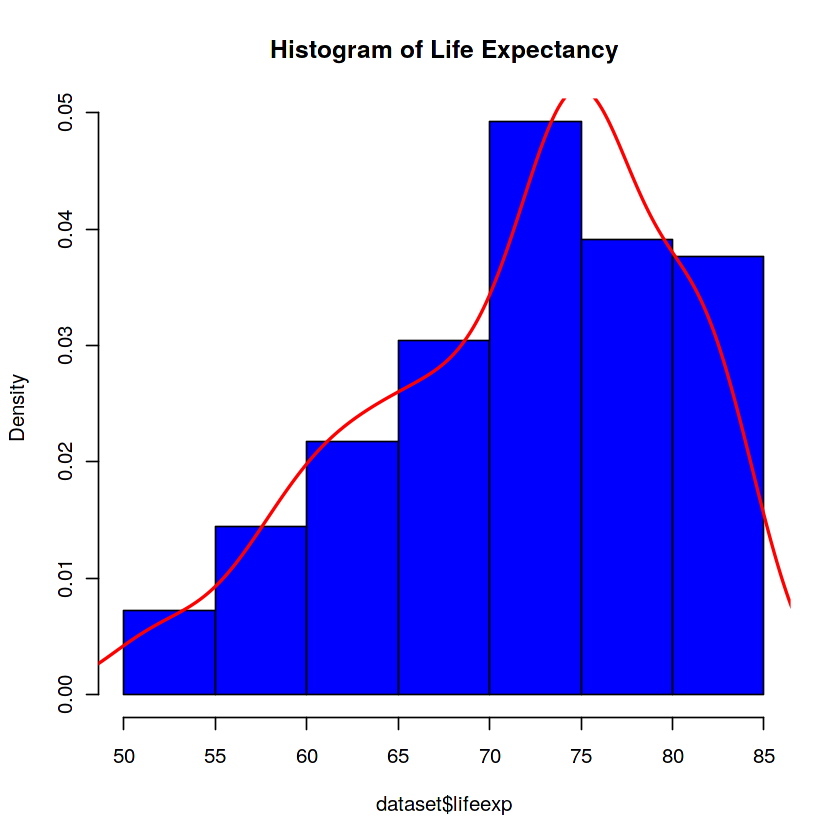

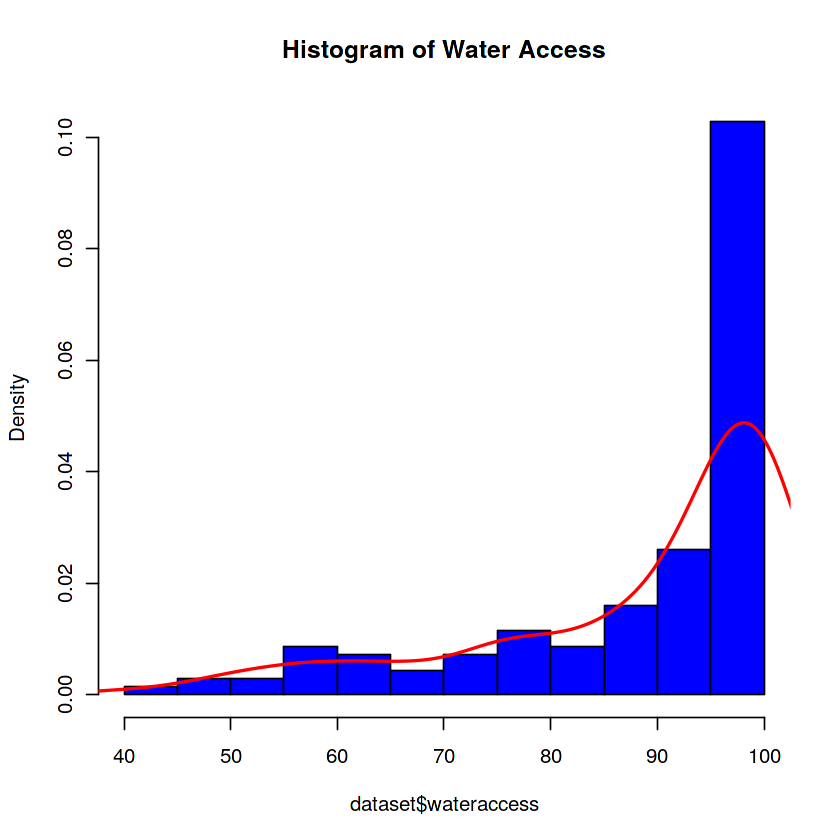

In [13]:
b<- hist(dataset$lifeexp,prob=TRUE, main = "Histogram of Life Expectancy"  ,col="blue")
lines(density(dataset$lifeexp), col="red", lwd=2)


c<-hist(dataset$wateraccess, prob=TRUE, main = "Histogram of Water Access" , col = "blue")
lines(density(dataset$wateraccess),col="red", lwd=2)

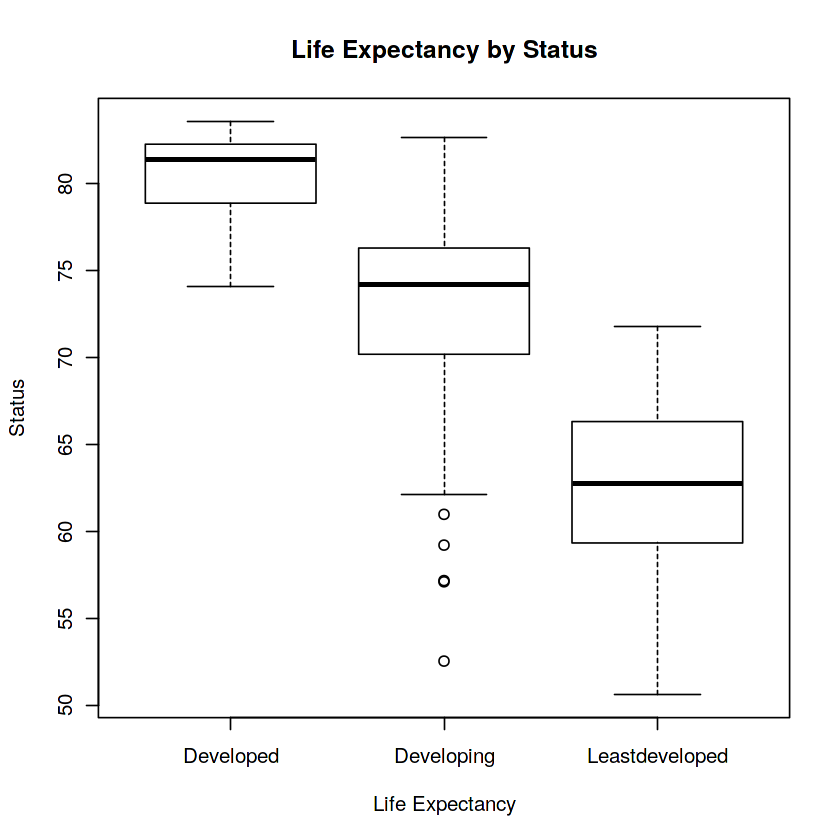

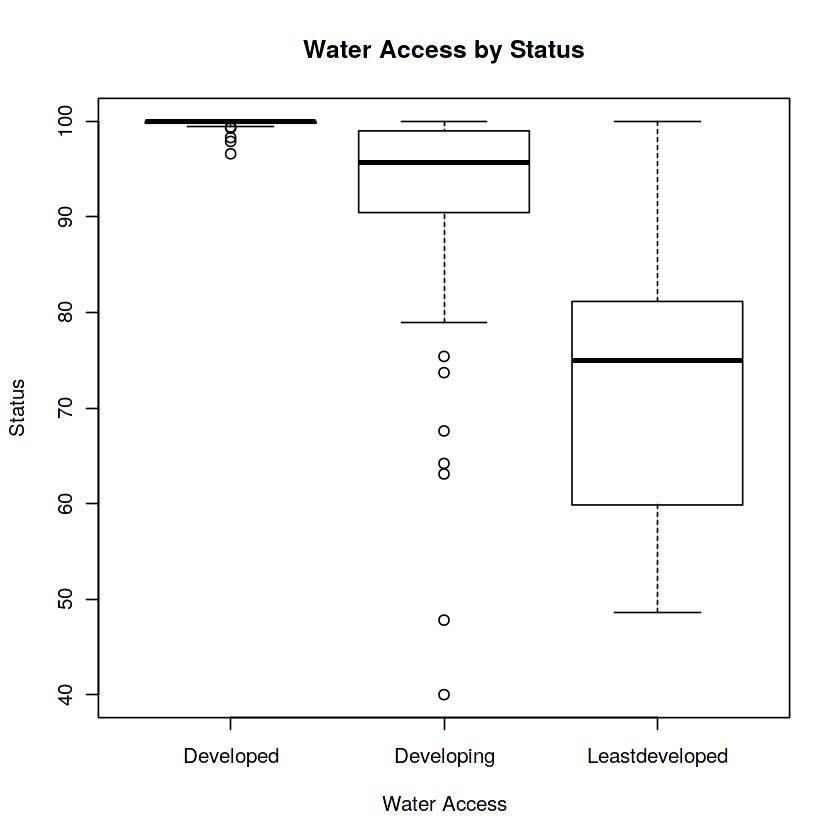

In [14]:
p<-boxplot(lifeexp ~ Status, data = dataset, xlab = "Life Expectancy",
           ylab = "Status", main = "Life Expectancy by Status" )

c<-boxplot(wateraccess ~ Status, data = dataset, xlab = "Water Access",
           ylab = "Status", main = "Water Access by Status" )

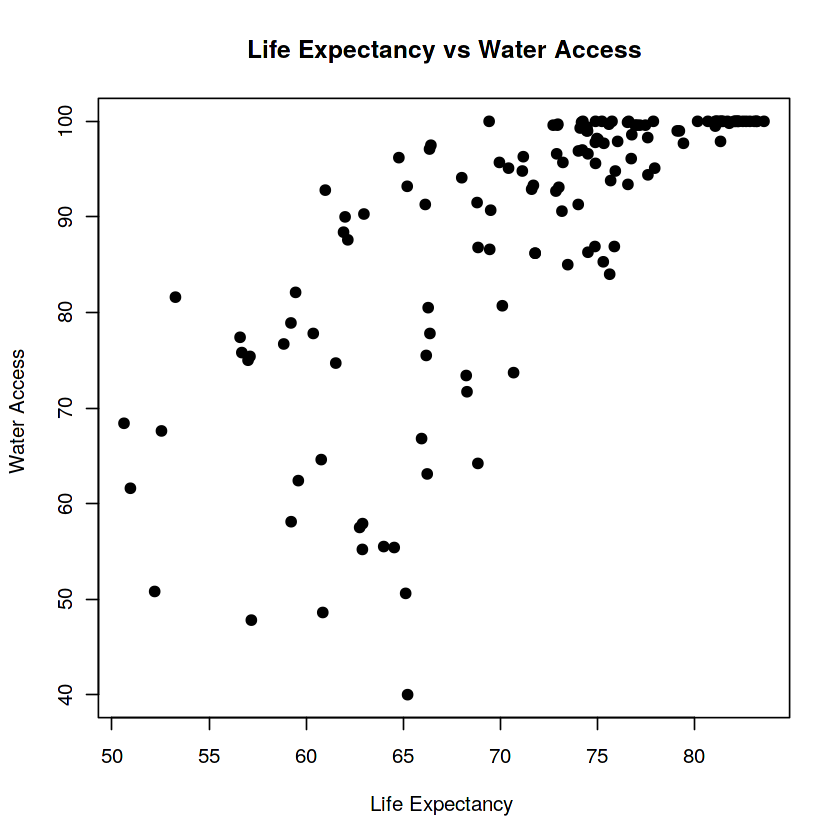

In [15]:
f<-plot(dataset$lifeexp, dataset$wateraccess, main="Life Expectancy vs Water Access",
        xlab="Life Expectancy ", ylab="Water Access ", pch=19)

## Conclusion

These results show us that 28 countries are developed, 75 are developing and 35 are leastdeveloped.
The mean and median values of the wateraccess and lifeexp variables of developed
countries are very close together. This means that there is no difference between these countries.
It's not too much in the range anyway.

Although the mean and median values of the developing countries are close together, the range
in the wateraccess variable is too much, this result shows us that the development level of the
countries does not have a very important effect on the rate of access to water. The average water
access rate in developed countries is 99, while in developing countries this rate is 91 percent.
Other than that, the expected life is much higher in developed countries.

If we look at least-developed countries, the range is not as high as the previous category, and the
difference between mean-median values is very small. In particular, the expected life expectancy
and median of these countries are almost the same. And the standard deviation isn't too much.

There may be a positive strong correlation between the life expectancy of countries and the level
of development. As a result, the rate of access water and expected life values of developed
countries are much higher than in other countries. All of these results give us clues as to how
high the economic situation of the countries has an impact on these values.